In [1]:
import re
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action="ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn import svm
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix, classification_report
import string

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

In [2]:
# Load the df dataframe
df = pd.read_csv('yelp_ml.csv')

In [3]:
df.head()

,is_open,business_id,name,stars,review_count,categories,attributes.RestaurantsTableService,attributes.WiFi,attributes.BikeParking,attributes.BusinessAcceptsCreditCards,...,attributes.divey,attributes.trendy,attributes.classy,attributes.casual,attributes.dessert,attributes.latenight,attributes.lunch,attributes.dinner,attributes.brunch,attributes.breakfast
0,1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,"Gastropubs, Food, Beer Gardens, Restaurants, B...",True,'free',True,True,...,False,False,False,True,False,False,False,False,False,False
1,1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,4.0,126,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",Not listed,'free',False,True,...,False,False,False,True,False,False,True,False,False,True
2,1,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3.5,169,"Restaurants, Thai",Not listed,'no',True,Not listed,...,False,False,False,True,False,False,True,True,False,False
3,1,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,4.5,11,"Breakfast & Brunch, Restaurants",Not listed,Not listed,Not listed,Not listed,...,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed
4,1,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,4.0,39,"Food, Pizza, Restaurants",False,'free',True,True,...,False,False,False,True,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed


In [4]:
# Assign attribute column names
attribute_col = [col for col in df.columns if 'attribute' in col]

In [5]:
# Transform attribute cols to OneHotEncoded
df_ml = pd.get_dummies(df[attribute_col])
df_ml.insert(loc=0, column='is_open', value=df['is_open'])

In [6]:
df_ml.head()

,is_open,attributes.RestaurantsTableService_False,attributes.RestaurantsTableService_Not listed,attributes.RestaurantsTableService_True,attributes.WiFi_'free',attributes.WiFi_'no',attributes.WiFi_'paid',attributes.WiFi_Not listed,attributes.BikeParking_False,attributes.BikeParking_Not listed,...,attributes.lunch_True,attributes.dinner_False,attributes.dinner_Not listed,attributes.dinner_True,attributes.brunch_False,attributes.brunch_Not listed,attributes.brunch_True,attributes.breakfast_False,attributes.breakfast_Not listed,attributes.breakfast_True
0,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,1,0,1,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


# Attributes - Logistic Regression

### Baseline Model - Logistic Regression

In [7]:
# Define X and y
X = df_ml.drop('is_open', axis=1)
y = df_ml['is_open']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [8]:
# Logistic Regression - Baseline model
lr = LogisticRegression(max_iter=1000, random_state=3)

In [9]:
# Fit the data and predict
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [10]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69      6429
           1       0.82      0.90      0.86     11970

    accuracy                           0.80     18399
   macro avg       0.79      0.76      0.77     18399
weighted avg       0.80      0.80      0.80     18399



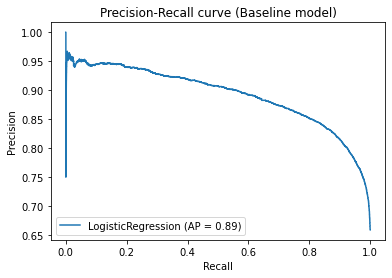

In [11]:
# Plot precision recall curve
plot_precision_recall_curve(lr, X_test, y_test)
plt.title('Precision-Recall curve (Baseline model)')
plt.show()

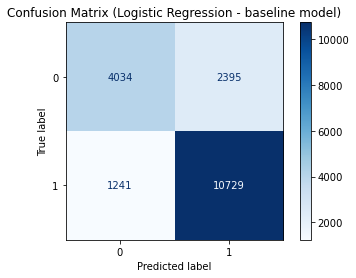

In [12]:
# Plot confusion matrix
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression - baseline model)')
plt.show()

#### Let's not forget! We have imbalanced dataset.

In [13]:
print('There are {} closed restaurants.'.format(len(df_ml[df_ml.is_open == 0])))
print('There are {} open restaurants.'.format(len(df_ml[df_ml.is_open == 1])))

There are 21428 closed restaurants.
There are 39900 open restaurants.


##### Balancing techniques will have to be used to balanced the dataset.

### Class Weight vs. Upsampling performance - Logistic Regression

Theoretically, applying class weight vs. upsampling should be almost exactly the same. But both performances will be tested on a baseline model to see which performs better.

#### Class weight performance

In [14]:
# Define class weight
weight = {0: (len(df_ml[df_ml.is_open == 1])/len(df_ml[df_ml.is_open == 0])) , 1:1}

# Fit the data and predict
lr2 = LogisticRegression(max_iter=1000, random_state=3, class_weight=weight)
lr2.fit(X_train, y_train)
y_pred2 = lr2.predict(X_test)

In [15]:
# Define KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

In [16]:
# Print classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      6429
           1       0.86      0.79      0.82     11970

    accuracy                           0.77     18399
   macro avg       0.75      0.77      0.76     18399
weighted avg       0.79      0.77      0.78     18399



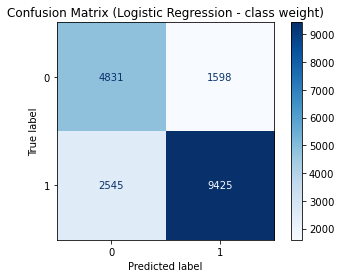

In [17]:
plot_confusion_matrix(lr2, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression - class weight)')
plt.show()

In [18]:
# Average cross validation score
print('Average cross validation score: %.3f' % cross_val_score(lr2, X_train, y_train, cv=kfold, scoring='f1').mean())

Average cross validation score: 0.816


#### Upsampling performance

In [19]:
# Concatenate the training data
df_Xy_train = pd.concat([y_train, X_train], axis=1)
df_Xy_train.head()

,is_open,attributes.RestaurantsTableService_False,attributes.RestaurantsTableService_Not listed,attributes.RestaurantsTableService_True,attributes.WiFi_'free',attributes.WiFi_'no',attributes.WiFi_'paid',attributes.WiFi_Not listed,attributes.BikeParking_False,attributes.BikeParking_Not listed,...,attributes.lunch_True,attributes.dinner_False,attributes.dinner_Not listed,attributes.dinner_True,attributes.brunch_False,attributes.brunch_Not listed,attributes.brunch_True,attributes.breakfast_False,attributes.breakfast_Not listed,attributes.breakfast_True
4537,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
55562,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
43077,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8597,1,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
26000,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [20]:
# Separate closed and open restaurants
df_closed = df_Xy_train[df_Xy_train.is_open == 0]
df_open = df_Xy_train[df_Xy_train.is_open == 1]

In [21]:
print('From the training set, there are {} closed restaurants.'.format(len(df_closed)))
print('From the training set, there are {} open restaurants.'.format(len(df_open)))

From the training set, there are 14999 closed restaurants.
From the training set, there are 27930 open restaurants.


In [22]:
# Upsample closed restaurants
df_closed = resample(df_closed, replace=True, n_samples=len(df_open), random_state=3) 

In [23]:
# Combine open and upsampled closed restaurants
df_upsampled = pd.concat([df_closed, df_open])

In [24]:
# Split the upsampled data into X_train and y_train
X_train_up = df_upsampled.drop('is_open', axis=1)
y_train_up = df_upsampled['is_open']

In [25]:
# Fit the data and predict
lr3 = LogisticRegression(max_iter=1000, random_state=3)
lr3.fit(X_train_up, y_train_up)
y_pred3 = lr3.predict(X_test)

In [26]:
# Print classification report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      6429
           1       0.86      0.79      0.82     11970

    accuracy                           0.77     18399
   macro avg       0.75      0.77      0.76     18399
weighted avg       0.79      0.77      0.78     18399



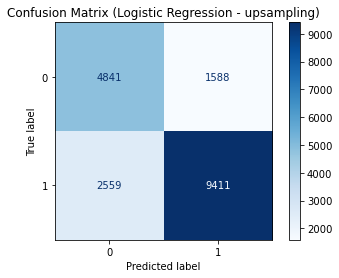

In [27]:
plot_confusion_matrix(lr3, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression - upsampling)')
plt.show()

In [28]:
# Print average cross val score
print('Average cross validation score: %.3f' % cross_val_score(lr3, X_train_up, y_train_up, cv=kfold, scoring='f1').mean())

Average cross validation score: 0.768


##### Class weight and Upsampling resulted in same weighted avg f1 scores, but 'class weight' had better average f1 cross validation score

### Search for the best hyper parameter using RandomSearchCV - Logistic Regression.

In [29]:
# Set the parameters to search for
lr5 = LogisticRegression(class_weight=weight, random_state=3)

lr_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
           'dual':[True, False],
          'max_iter':[int(x) for x in np.linspace(start=500, stop=1500, num=100)],
          'C':[0.5,1.0,1.5]}

In [30]:
# Define Random Search CV
lr_random = RandomizedSearchCV(estimator = lr5, param_distributions=lr_grid, cv = kfold, random_state=3, n_jobs = -1)

In [31]:
# Fit the training data
lr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
                   estimator=LogisticRegression(class_weight={0: 1.8620496546574576,
                                                              1: 1},
                                                random_state=3),
                   n_jobs=-1,
                   param_distributions={'C': [0.5, 1.0, 1.5],
                                        'dual': [True, False],
                                        'max_iter': [500, 510, 520, 530, 540,
                                                     550, 560, 570, 580, 590,
                                                     601, 611, 621, 631, 641,
                                                     651, 661, 671, 681, 691,
                                                     702, 712, 722, 732, 742,
                                                     752, 762, 772, 782, 792, ...],
                                        'penalty': ['l1', 'l2', 'elasticnet',
   

In [32]:
# Print the best parameters
print(lr_random.best_params_)

{'penalty': 'l2', 'max_iter': 1479, 'dual': False, 'C': 0.5}


In [33]:
# Instantiate LogisticRegression
lr6 = LogisticRegression(**lr_random.best_params_, class_weight=weight, random_state=3)

In [34]:
# Fit data and predict
lr6.fit(X_train, y_train)
y_pred6 = lr6.predict(X_test)

In [35]:
# Print classification report
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      6429
           1       0.86      0.79      0.82     11970

    accuracy                           0.78     18399
   macro avg       0.76      0.77      0.76     18399
weighted avg       0.79      0.78      0.78     18399



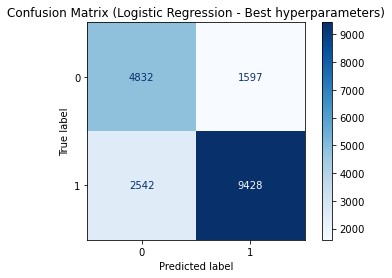

In [36]:
# Plot confusion matrix
plot_confusion_matrix(lr6, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression - Best hyperparameters)')
plt.show()

In [37]:
# Check cross validated classification report
cross_predicted = cross_val_predict(lr6, X, y, cv=kfold)
print(classification_report(y, cross_predicted))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70     21428
           1       0.85      0.79      0.82     39900

    accuracy                           0.77     61328
   macro avg       0.75      0.77      0.76     61328
weighted avg       0.78      0.77      0.78     61328



In [38]:
print('Average cross validation score: %.3f' % cross_val_score(lr6, X_train, y_train, cv=kfold, scoring='f1').mean())

Average cross validation score: 0.816


#### RandomSearchCV did not improve weighted avg f1 scores for logistic regression. 
### Best weighted average f1 score was 0.78, while best cross validation score with 5-kfold was 0.82

# Attributes - Random Forest

### Random Forest Baseline Model - Attributes

In [39]:
# Random Forest Baseline Model
rf = RandomForestClassifier(n_estimators=100, random_state=3)

In [40]:
# Define X and y
X = df_ml.drop('is_open', axis=1)
y = df_ml['is_open']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [41]:
# Fit data, predict, and print accuracy
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [42]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72      6429
           1       0.83      0.91      0.87     11970

    accuracy                           0.82     18399
   macro avg       0.81      0.78      0.79     18399
weighted avg       0.82      0.82      0.82     18399



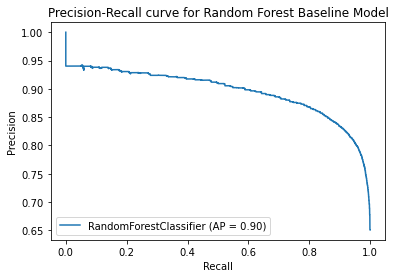

In [43]:
# Plot Precision Recall Curve
plot_precision_recall_curve(rf, X_test, y_test)
plt.title('Precision-Recall curve for Random Forest Baseline Model')
plt.show()

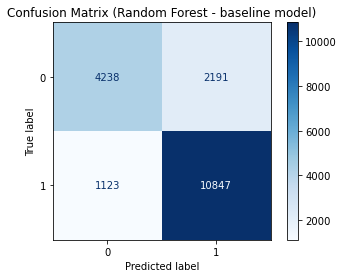

In [44]:
# Plot confusion matrix
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest - baseline model)')
plt.show()

### Class Weight vs. Upsampling performance - Random Forest

##### Class weight performance

In [45]:
# Fit the data and predict
rf2 = RandomForestClassifier(n_estimators=100, random_state=3, class_weight=weight)
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)

In [46]:
# Print classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      6429
           1       0.83      0.90      0.86     11970

    accuracy                           0.82     18399
   macro avg       0.81      0.78      0.79     18399
weighted avg       0.81      0.82      0.81     18399



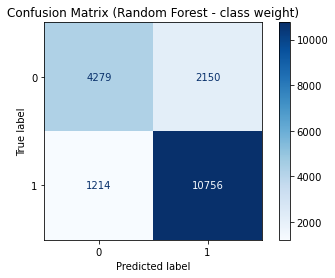

In [47]:
# Plot confusion matrix
plot_confusion_matrix(rf2, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest - class weight)')
plt.show()

In [48]:
# Average cross validation score
print('Average cross validation score: %.3f' % cross_val_score(rf2, X_train, y_train, cv=kfold, scoring='f1').mean())

Average cross validation score: 0.863


##### Upsampling performance

In [49]:
# Define X and y
X = df_ml.drop('is_open', axis=1)
y = df_ml['is_open']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [50]:
# Concatenate the training data
df_Xy_train = pd.concat([y_train, X_train], axis=1)
df_Xy_train.head()

,is_open,attributes.RestaurantsTableService_False,attributes.RestaurantsTableService_Not listed,attributes.RestaurantsTableService_True,attributes.WiFi_'free',attributes.WiFi_'no',attributes.WiFi_'paid',attributes.WiFi_Not listed,attributes.BikeParking_False,attributes.BikeParking_Not listed,...,attributes.lunch_True,attributes.dinner_False,attributes.dinner_Not listed,attributes.dinner_True,attributes.brunch_False,attributes.brunch_Not listed,attributes.brunch_True,attributes.breakfast_False,attributes.breakfast_Not listed,attributes.breakfast_True
4537,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
55562,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
43077,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8597,1,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
26000,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [51]:
# Separate closed and open restaurants
df_closed = df_Xy_train[df_Xy_train.is_open == 0]
df_open = df_Xy_train[df_Xy_train.is_open == 1]

In [52]:
print('From the training set, there are {} closed restaurants.'.format(len(df_closed)))
print('From the training set, there are {} open restaurants.'.format(len(df_open)))

From the training set, there are 14999 closed restaurants.
From the training set, there are 27930 open restaurants.


In [53]:
# Upsample closed restaurants
df_closed = resample(df_closed, replace=True, n_samples=len(df_open), random_state=3) 

In [54]:
# Combine open and upsampled closed restaurants
df_upsampled = pd.concat([df_closed, df_open])

In [55]:
# Split the upsampled data into X_train and y_train
X_train_up = df_upsampled.drop('is_open', axis=1)
y_train_up = df_upsampled['is_open']

In [56]:
# Fit the data and predict
rf3 = RandomForestClassifier(n_estimators=100, random_state=3)
rf3.fit(X_train_up, y_train_up)
y_pred3 = rf3.predict(X_test)

In [57]:
# Print classification report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      6429
           1       0.84      0.89      0.86     11970

    accuracy                           0.81     18399
   macro avg       0.80      0.78      0.79     18399
weighted avg       0.81      0.81      0.81     18399



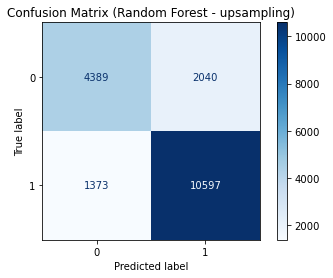

In [58]:
plot_confusion_matrix(rf3, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest - upsampling)')
plt.show()

In [59]:
# Print average cross val score
print('Average cross validation score: %.3f' % cross_val_score(rf3, X_train_up, y_train_up, cv=kfold, scoring='f1').mean())

Average cross validation score: 0.887


##### Class weight and Upsampling resulted in same weighted avg f1 scores, but 'upsampling had better average f1 cross validation score

### Search for the best hyper parameter using RandomSearchCV - Random Forest

In [60]:
# Create the base model to tune
rf5 = RandomForestClassifier(random_state=3)

random_grid = {'bootstrap': [True, False],
                'max_depth': [10, 30, 50, 70, 90, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 4, 8],
                'min_samples_split': [2, 5, 10, 15],
                'n_estimators': [50, 100, 150, 200]
              }

In [61]:
# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = rf5, 
                               param_distributions = random_grid, 
                               cv = kfold, 
                               verbose=2, 
                               random_state=3, 
                               n_jobs = -1
                              )

In [62]:
# Fit the random search model (using upsampled samples this time)
rf_random.fit(X_train_up, y_train_up)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
                   estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 30, 50, 70, 90, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=3, verbose=2)

In [63]:
print(rf_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


In [64]:
# Fit the data and predict
rf6 = RandomForestClassifier(**rf_random.best_params_, random_state=3)
rf6.fit(X_train_up, y_train_up)
y_pred6 = rf6.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71      6429
           1       0.83      0.90      0.86     11970

    accuracy                           0.81     18399
   macro avg       0.80      0.78      0.79     18399
weighted avg       0.81      0.81      0.81     18399



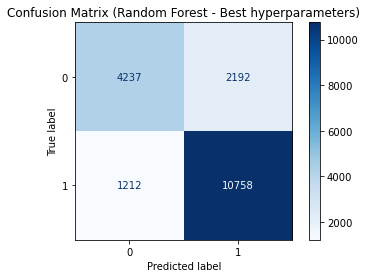

In [66]:
# Plot confusion matrix
plot_confusion_matrix(rf6, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest - Best hyperparameters)')
plt.show()

In [67]:
# Print average cross val score
print('Average cross validation score: %.3f' % cross_val_score(rf6, X_train_up, y_train_up, cv=kfold, scoring='f1').mean())

Average cross validation score: 0.893


#### RandomSearchCV did not improve weighted avg f1 scores for Random Forest. 
### Best weighted average f1 score was 0.81, while best cross validation score with 5-kfold was 0.89

# Attributes - XGBOOST

### XGBoost Baseline model - Attributes

In [68]:
# Instantiate XGB
xgb_classifier = xgb.XGBClassifier(objective = 'binary:logistic', scale_pos_weight=weight[0], random_state=3)

scale_pos_weight for imbalanced dataset

In [69]:
# Fit and predict
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

[11:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70      6429
           1       0.81      0.95      0.88     11970

    accuracy                           0.83     18399
   macro avg       0.84      0.77      0.79     18399
weighted avg       0.83      0.83      0.82     18399



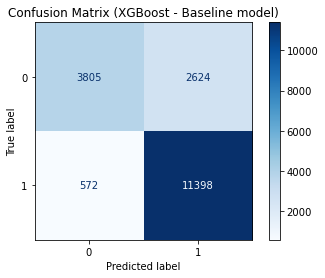

In [71]:
# Plot confusion matrix
plot_confusion_matrix(xgb_classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (XGBoost - Baseline model)')
plt.show()

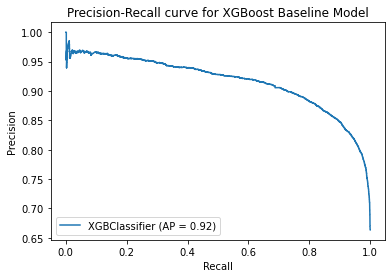

In [72]:
# Plot Precision Recall Curve
plot_precision_recall_curve(xgb_classifier, X_test, y_test)
plt.title('Precision-Recall curve for XGBoost Baseline Model')
plt.show()

### Search for the best hyper parameter using RandomSearchCV - XGBoost

In [76]:
# Define parameters
xgb_classifier2 =  xgb.XGBClassifier(objective = 'binary:logistic', scale_pos_weight=weight[0], random_state=3)

random_grid = {'n_estimators': [75, 100, 125],
              'learning_rate': [0.05, 0.1, 0.2, 0.3],
              'subsample': [0.6, 0.8, 1.0],
              'max_depth': [5, 10, 15],
              'colsample_bytree': [0.7, 1.0, 1.3],
              'min_child_weight': [1, 5, 10]
             }

In [77]:
# Set up RandomSearch
xgb_random = RandomizedSearchCV(xgb_classifier2, 
                                param_distributions = random_grid,
                                cv = kfold,
                                n_iter=5,
                                scoring = 'f1', 
                                random_state=3, 
                                verbose = 2, 
                                n_jobs = -1)

In [78]:
# Fit the random search model
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  1.8min remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.9min finished


[11:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan...
                                           scale_pos_weight=1.8620496546574576,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                         

In [79]:
print(xgb_random.best_params_)

{'subsample': 0.6, 'n_estimators': 125, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.7}


In [80]:
# Instantiate with best params
xgb_classifier3 = xgb.XGBClassifier(objective = 'binary:logistic', 
                                    scale_pos_weight=weight[0], 
                                    random_state=3,
                                    **xgb_random.best_params_)

In [81]:
# Fit and predict
xgb_classifier3.fit(X_train, y_train)
y_pred3 = xgb_classifier3.predict(X_test)

[11:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [82]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70      6429
           1       0.81      0.95      0.88     11970

    accuracy                           0.83     18399
   macro avg       0.84      0.77      0.79     18399
weighted avg       0.83      0.83      0.82     18399



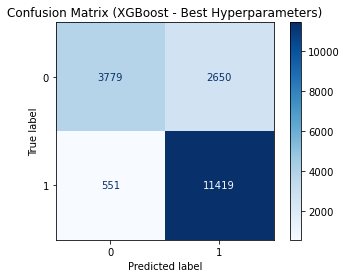

In [83]:
# Plot confusion matrix
plot_confusion_matrix(xgb_classifier3, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (XGBoost - Best Hyperparameters)')
plt.show()

In [84]:
# Print average cross val score
print('Average cross validation score: %.3f' % cross_val_score(xgb_classifier3, X_train, y_train, cv=kfold, scoring='f1').mean())

[11:32:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### RandomSearchCV did not improve weighted avg f1 scores for XGBoost. 
### Best weighted average f1 score was 0.82, while best cross validation score with 5-kfold was 0.87

# Attributes - Keras

In [85]:
# Keras doesn't have f1, so define functions
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [86]:
# Define then run the Keras model
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', f1_m, precision_m, recall_m])

# fit the model
hist = model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_split=0.3, class_weight=weight)

Epoch 1/10
940/940 [==============================] - 7s 3ms/step - loss: 0.8069 - acc: 0.6951 - f1_m: 0.7174 - precision_m: 0.7929 - recall_m: 0.6948 - val_loss: 0.5595 - val_acc: 0.7867 - val_f1_m: 0.8432 - val_precision_m: 0.7977 - val_recall_m: 0.9006
Epoch 2/10
940/940 [==============================] - 3s 3ms/step - loss: 0.8543 - acc: 0.7146 - f1_m: 0.7408 - precision_m: 0.8054 - recall_m: 0.7210 - val_loss: 0.6244 - val_acc: 0.7374 - val_f1_m: 0.8258 - val_precision_m: 0.7205 - val_recall_m: 0.9752
Epoch 3/10
940/940 [==============================] - 3s 3ms/step - loss: 0.7249 - acc: 0.7628 - f1_m: 0.8036 - precision_m: 0.8321 - recall_m: 0.8011 - val_loss: 0.4692 - val_acc: 0.8066 - val_f1_m: 0.8538 - val_precision_m: 0.8269 - val_recall_m: 0.8885
Epoch 4/10
940/940 [==============================] - 3s 3ms/step - loss: 0.8118 - acc: 0.6722 - f1_m: 0.6647 - precision_m: 0.7257 - recall_m: 0.6343 - val_loss: 0.5326 - val_acc: 0.7607 - val_f1_m: 0.8075 - val_precision_m: 0.8343

In [87]:
# Evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

In [88]:
# Print f1 score
print('Keras Model F1 score from Keras is {}'.format(f1_score))

Keras Model F1 score from Keras is 0.8555076122283936


In [89]:
# Predict
y_pred = model.predict_classes(np.array(X_test))

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.72      6429
           1       0.84      0.88      0.86     11970

    accuracy                           0.81     18399
   macro avg       0.80      0.78      0.79     18399
weighted avg       0.81      0.81      0.81     18399



### Best model f1 score was 0.86, while weighted average was 0.81